## Define Problem Statement
**My Client is an Airlines-maintenenace and Operations Company they have the Dataset which contains attributes like Aircraft Model,Empty_Weight(kg),Maximum_Takeoff_Weight(kg)->{Target},Maximum_Landing_Weight(kg)	,Center of Gravity Limits,Wing Loading (kg/mÂ²),Tail Loading (kg/mÂ²),Fuel Capacity (liters),Number of Passengers,Maximum Altitude (ft),Cargo Capacity (kg),Maximum Speed (knots),Engine Type,Fuselage Length (m),my clients expectation is to optimizing the Maximum Takeoff Weight (kg) to meet customers demands and efficiently transport goods.The accurate prediction of Maximum Takeoff Weight will assist my clients in Efficient fuel consumption and payload management,route optimization,flight planning and to ensure compliance with the Aviation Safety Standards and  regulations.

In [154]:
## Importing the all Necessary Python packages,
import pandas as p
import numpy as n
import matplotlib.pyplot as pt
import seaborn as sns 
from pandasql import sqldf
%matplotlib inline 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

## Data Collection
The Source of the Data is Kaggle.com:: https://www.kaggle.com/datasets/aadharshviswanath/investigating-aircraft-weight-and-balance-metrics

In [230]:
data= p.read_csv('aircraft_dataset.csv')
df=data.copy() ## Retaining the Original Copy of data and creating a copy for Further steps,

### Data Understanding 
* Data Shape.
* Head(top 5 rows) and tail(Bottom 5 rows).
* dtypes.
* describe.
* Null Values.
* Duplicated values.

In [229]:
print(df.shape)
print(f' Our Dataset:- \n{df.shape[0]} Rows and {df.shape[1]} Attributes')

(25000, 14)
 Our Dataset:- 
25000 Rows and 14 Attributes


In [4]:
## Top 3 columns:-
df.head(3)

,Unnamed: 0,Aircraft Model,Empty Weight (kg),Maximum Takeoff Weight (kg),Maximum Landing Weight (kg),Center of Gravity Limits,Wing Loading (kg/m²),Tail Loading (kg/m²),Fuel Capacity (liters),Number of Passengers,Cargo Capacity (kg),Maximum Altitude (ft),Maximum Speed (knots),Engine Type,Fuselage Length (m)
0,0,Airbus A320,149968.1875,279525.0910,255896.4903,25%-35% of MAC,818.558282,124.788364,52538.23617,472,80061.73229,44470,658,Turbofan,41.726817
1,1,Boeing 777,140855.8799,145055.1739,143703.3146,15%-30% of MAC,366.423230,111.743182,298000.26600,257,27118.72519,31739,495,Turbofan,54.402799
2,2,Airbus A320,151024.5989,534343.9480,270662.9043,20%-35% of MAC,829.145903,138.672695,176299.25460,172,1002.20911,24398,585,Turboprop,28.864086


In [231]:
## Renaming the lengthy Columns::
df=df.rename(columns={'Maximum Takeoff Weight (kg)':'Maximum_Takeoff_Weight(kgs)','Empty Weight (kg)':'Empty_Weight(kgs)','Maximum Landing Weight (kg)':'Maximum_Landing_Weight(kg)'})

In [232]:
## Bottom 3 columns:-
df.tail(3)

,Unnamed: 0,Aircraft Model,Empty_Weight(kgs),Maximum_Takeoff_Weight(kgs),Maximum_Landing_Weight(kg),Center of Gravity Limits,Wing Loading (kg/m²),Tail Loading (kg/m²),Fuel Capacity (liters),Number of Passengers,Cargo Capacity (kg),Maximum Altitude (ft),Maximum Speed (knots),Engine Type,Fuselage Length (m)
24997,24997,Gulfstream G650,34559.59282,127249.3324,125404.4106,20%-40% of MAC,517.456695,147.840228,97968.10473,289,60801.74708,36838,441,Turboprop,58.920670
24998,24998,Beechcraft King Air 350,94871.53644,257303.7329,191036.1317,20%-35% of MAC,782.307394,120.828459,39422.45891,421,35974.88781,52334,673,Turboprop,69.698684
24999,24999,Bombardier Global 6000,156700.30370,742250.5530,259282.3457,20%-40% of MAC,837.661585,109.230488,96468.70253,175,53272.13493,57463,692,Turbofan,23.304120


In [233]:
#Datatypes of the DataSet:-
df.dtypes

Unnamed: 0                       int64
Aircraft Model                  object
Empty_Weight(kgs)              float64
Maximum_Takeoff_Weight(kgs)    float64
Maximum_Landing_Weight(kg)     float64
Center of Gravity Limits        object
Wing Loading (kg/m²)           float64
Tail Loading (kg/m²)           float64
Fuel Capacity (liters)         float64
Number of Passengers             int64
Cargo Capacity (kg)            float64
Maximum Altitude (ft)            int64
Maximum Speed (knots)            int64
Engine Type                     object
Fuselage Length (m)            float64
dtype: object

In [234]:
## Understand the statistics of Numerical Attribute
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25000.0,12499.500000,7217.022701,0.000000,6249.750000,12499.500000,18749.250000,2.499900e+04
Empty_Weight(kgs),25000.0,150550.712410,86463.623898,523.501931,75478.577895,150022.889150,225922.318875,2.999965e+05
Maximum_Takeoff_Weight(kgs),25000.0,452651.571177,328455.147464,708.131424,189127.952750,380603.519650,660066.951300,1.498140e+06
Maximum_Landing_Weight(kg),25000.0,301956.454102,232384.548074,631.016228,127768.827550,254870.505450,411266.544975,1.435393e+06
Wing Loading (kg/m²),25000.0,598.404186,231.058661,200.077157,398.572198,596.545232,799.258956,9.999546e+02
Tail Loading (kg/m²),25000.0,109.806503,52.008772,20.019328,64.916463,109.641132,154.733859,2.000000e+02
Fuel Capacity (liters),25000.0,249099.077932,144365.178161,1002.584912,124086.001950,248362.359600,374861.477450,4.999539e+05
Number of Passengers,25000.0,274.545560,129.985611,50.000000,162.000000,274.000000,387.000000,5.000000e+02
Cargo Capacity (kg),25000.0,50152.936766,28464.768809,1002.043840,25860.125040,49845.885535,74845.195460,9.999524e+04
Maximum Altitude (ft),25000.0,39961.992880,11570.426026,20001.000000,29910.000000,39920.500000,50000.250000,6.000000e+04


In [235]:
## Missing-values/null values in the Dataset:-
df.isna().sum()

Unnamed: 0                     0
Aircraft Model                 0
Empty_Weight(kgs)              0
Maximum_Takeoff_Weight(kgs)    0
Maximum_Landing_Weight(kg)     0
Center of Gravity Limits       0
Wing Loading (kg/m²)           0
Tail Loading (kg/m²)           0
Fuel Capacity (liters)         0
Number of Passengers           0
Cargo Capacity (kg)            0
Maximum Altitude (ft)          0
Maximum Speed (knots)          0
Engine Type                    0
Fuselage Length (m)            0
dtype: int64

In [236]:
## Duplicates Check in the Dataset :-
df[df.duplicated()]

,Unnamed: 0,Aircraft Model,Empty_Weight(kgs),Maximum_Takeoff_Weight(kgs),Maximum_Landing_Weight(kg),Center of Gravity Limits,Wing Loading (kg/m²),Tail Loading (kg/m²),Fuel Capacity (liters),Number of Passengers,Cargo Capacity (kg),Maximum Altitude (ft),Maximum Speed (knots),Engine Type,Fuselage Length (m)


#### Observations::
1)The Dataset consists of 25000 rows and 15 columns in that there is a Unnamed column which has no significant impact to our analysis & can be dropped.

2)There are No Null and Duplicate values are observed in our Dataset.

3)The lenghty column names are renamed for better readability.

4)The Attribute Center of Gravity Limits needs to be modified to to apply one hot encoder.

5)The Float values in our Dataset has multiple decimal points ,that can be rounded-off to 2 decimal points for better readability of Data.

## Data Exploration and Cleaning 

### 1)Dropping of the Unwanted Column: "Unnamed:0"

In [237]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [238]:
df.columns

Index(['Aircraft Model', 'Empty_Weight(kgs)', 'Maximum_Takeoff_Weight(kgs)',
       'Maximum_Landing_Weight(kg)', 'Center of Gravity Limits',
       'Wing Loading (kg/m²)', 'Tail Loading (kg/m²)',
       'Fuel Capacity (liters)', 'Number of Passengers', 'Cargo Capacity (kg)',
       'Maximum Altitude (ft)', 'Maximum Speed (knots)', 'Engine Type',
       'Fuselage Length (m)'],
      dtype='object')

### 2)Rounding off all the Float columns values to 2nd Decimal position:-

In [239]:
df.head(2)

,Aircraft Model,Empty_Weight(kgs),Maximum_Takeoff_Weight(kgs),Maximum_Landing_Weight(kg),Center of Gravity Limits,Wing Loading (kg/m²),Tail Loading (kg/m²),Fuel Capacity (liters),Number of Passengers,Cargo Capacity (kg),Maximum Altitude (ft),Maximum Speed (knots),Engine Type,Fuselage Length (m)
0,Airbus A320,149968.1875,279525.0910,255896.4903,25%-35% of MAC,818.558282,124.788364,52538.23617,472,80061.73229,44470,658,Turbofan,41.726817
1,Boeing 777,140855.8799,145055.1739,143703.3146,15%-30% of MAC,366.423230,111.743182,298000.26600,257,27118.72519,31739,495,Turbofan,54.402799


In [240]:
df.select_dtypes(['float64']).columns

Index(['Empty_Weight(kgs)', 'Maximum_Takeoff_Weight(kgs)',
       'Maximum_Landing_Weight(kg)', 'Wing Loading (kg/m²)',
       'Tail Loading (kg/m²)', 'Fuel Capacity (liters)', 'Cargo Capacity (kg)',
       'Fuselage Length (m)'],
      dtype='object')

In [169]:
## Creating an Function to Round-off the values :-
def Roundfunction(m):
    round(m,2)
    return round(m,2)

In [170]:
df['Empty_Weight(kgs)']=Roundfunction(df['Empty-Weight(kg)'])
df['Maximum_Takeoff_Weight(kgs)']=Roundfunction(df['Maximum Takeoff-Weight(kg)'])
df['Maximum_Landing_Weight(kgs)']=Roundfunction(df['Maximum Landing-Weight(kg)'])
df['Wing Loading (kg/m²)']=Roundfunction(df['Wing Loading (kg/m²)'])
df['Tail Loading (kg/m²)']=Roundfunction(df['Tail Loading (kg/m²)'])
df['Fuel Capacity (liters)']=Roundfunction(df['Fuel Capacity (liters)'])
df['Cargo Capacity (kg)']=Roundfunction(df['Cargo Capacity (kg)'])
df['Fuselage Length (m)']=Roundfunction(df['Fuselage Length (m)'])

In [242]:
df.columns

Index(['Aircraft Model', 'Empty_Weight(kgs)', 'Maximum_Takeoff_Weight(kgs)',
       'Maximum_Landing_Weight(kg)', 'Center of Gravity Limits',
       'Wing Loading (kg/m²)', 'Tail Loading (kg/m²)',
       'Fuel Capacity (liters)', 'Number of Passengers', 'Cargo Capacity (kg)',
       'Maximum Altitude (ft)', 'Maximum Speed (knots)', 'Engine Type',
       'Fuselage Length (m)'],
      dtype='object')

In [243]:
df.head(2)

,Aircraft Model,Empty_Weight(kgs),Maximum_Takeoff_Weight(kgs),Maximum_Landing_Weight(kg),Center of Gravity Limits,Wing Loading (kg/m²),Tail Loading (kg/m²),Fuel Capacity (liters),Number of Passengers,Cargo Capacity (kg),Maximum Altitude (ft),Maximum Speed (knots),Engine Type,Fuselage Length (m)
0,Airbus A320,149968.1875,279525.0910,255896.4903,25%-35% of MAC,818.558282,124.788364,52538.23617,472,80061.73229,44470,658,Turbofan,41.726817
1,Boeing 777,140855.8799,145055.1739,143703.3146,15%-30% of MAC,366.423230,111.743182,298000.26600,257,27118.72519,31739,495,Turbofan,54.402799


### 3)Altering the Values of the Attribute-Center of Gravity Limits to a Standardise and Numerical Value:

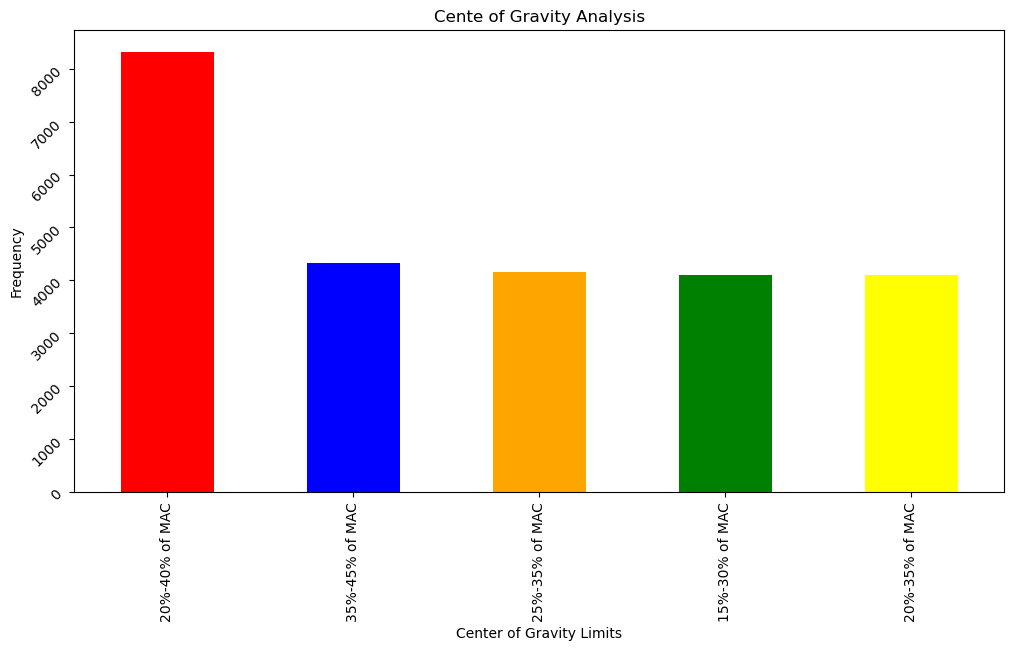

In [244]:
#step 1: To check the unique Values of the Center of Gravity Limits
pt.figure(figsize=(12,6))
pt.ylabel('Frequency')
pt.yticks(rotation=45)
data['Center of Gravity Limits'].\
value_counts().plot(kind='bar',color=['red','blue','orange','green','yellow']
                    ,title='Cente of Gravity Analysis')
pt.show()

In [245]:
#Step 2 : Extracting the Numeric values in to 2 different columns using string functions:-
df['first_number_Center_of_Gravity']=df['Center of Gravity Limits'].str.replace('of MAC','').str.replace('%',"").str.split('-').str.get(0).astype(int)
df['second_number_Center_of_Gravity']=df['Center of Gravity Limits'].str.replace('of MAC','').str.replace('%',"").str.split('-').str.get(1).astype(int)

In [246]:
#Step 3 :Calculating the mean value of the above 2 columns and storing it in a the main column-Center of Gravity Limits.
df['Center of Gravity Limits']=(df['first_number_Center_of_Gravity']+df['second_number_Center_of_Gravity'])/2
df['Center of Gravity Limits']

0        30.0
1        22.5
2        27.5
3        22.5
4        27.5
         ... 
24995    27.5
24996    22.5
24997    30.0
24998    27.5
24999    30.0
Name: Center of Gravity Limits, Length: 25000, dtype: float64

In [247]:
df.head(2)

,Aircraft Model,Empty_Weight(kgs),Maximum_Takeoff_Weight(kgs),Maximum_Landing_Weight(kg),Center of Gravity Limits,Wing Loading (kg/m²),Tail Loading (kg/m²),Fuel Capacity (liters),Number of Passengers,Cargo Capacity (kg),Maximum Altitude (ft),Maximum Speed (knots),Engine Type,Fuselage Length (m),first_number_Center_of_Gravity,second_number_Center_of_Gravity
0,Airbus A320,149968.1875,279525.0910,255896.4903,30.0,818.558282,124.788364,52538.23617,472,80061.73229,44470,658,Turbofan,41.726817,25,35
1,Boeing 777,140855.8799,145055.1739,143703.3146,22.5,366.423230,111.743182,298000.26600,257,27118.72519,31739,495,Turbofan,54.402799,15,30


In [248]:
#Step 4: Dropping the unwanted columns which are used to calculate the mean of Center of Gravity Limits
df=df.drop(['first_number_Center_of_Gravity','second_number_Center_of_Gravity'],axis=1)
df.head(2)

,Aircraft Model,Empty_Weight(kgs),Maximum_Takeoff_Weight(kgs),Maximum_Landing_Weight(kg),Center of Gravity Limits,Wing Loading (kg/m²),Tail Loading (kg/m²),Fuel Capacity (liters),Number of Passengers,Cargo Capacity (kg),Maximum Altitude (ft),Maximum Speed (knots),Engine Type,Fuselage Length (m)
0,Airbus A320,149968.1875,279525.0910,255896.4903,30.0,818.558282,124.788364,52538.23617,472,80061.73229,44470,658,Turbofan,41.726817
1,Boeing 777,140855.8799,145055.1739,143703.3146,22.5,366.423230,111.743182,298000.26600,257,27118.72519,31739,495,Turbofan,54.402799


### 4)plotting the Heatmap Correlation Between the numerical Attributes :-

In [249]:
df_corr=df.select_dtypes(['float64','int64']).corr()

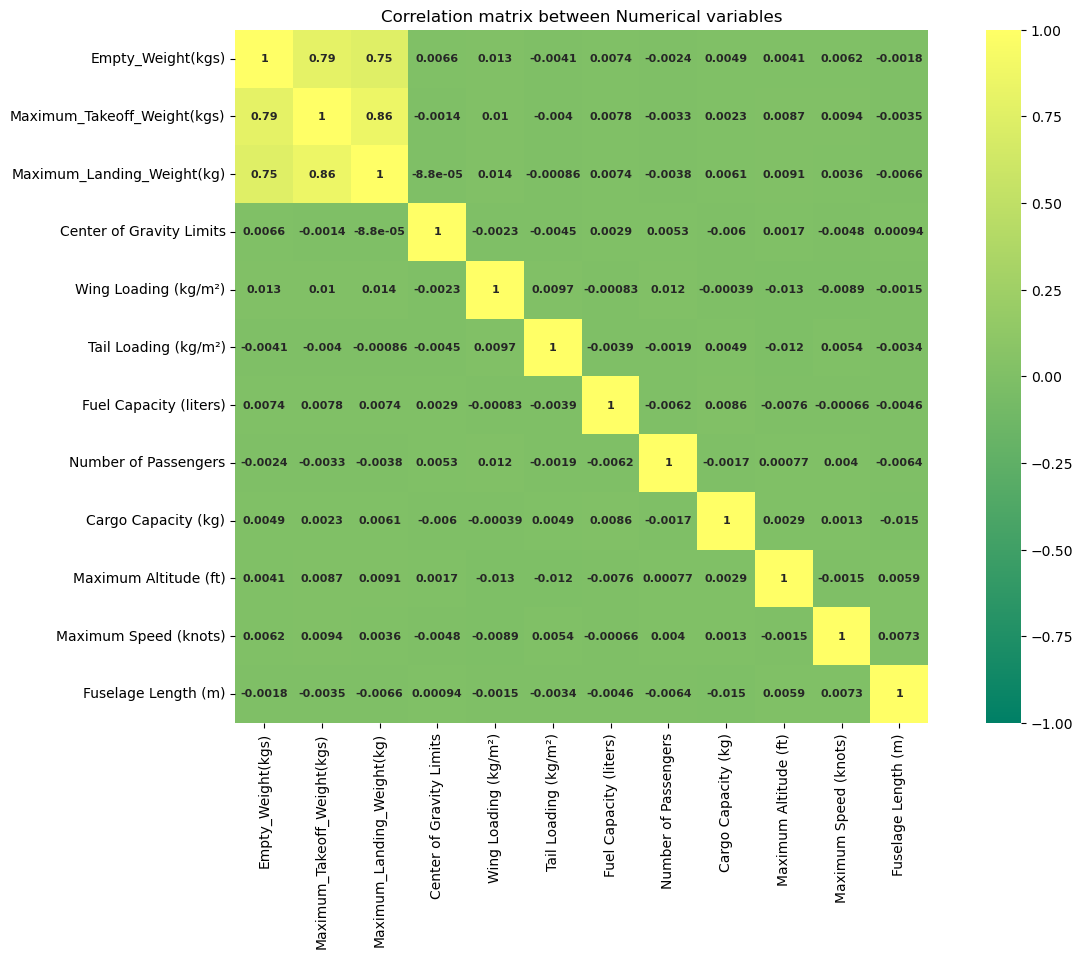

In [250]:
## Heat map for Correlation :-
pt.figure(figsize=(15,9))
sns.heatmap(df_corr,vmin=-1,vmax=1,cmap='summer',square=True,
           annot=True,annot_kws={'fontsize':8,'fontweight':'bold'})
pt.title("Correlation matrix between Numerical variables")
pt.show()

#### Observations::
1)From the Above Heatmap it can be seen that a High correlation between the Maximum_Takeoff_Weight, Maximum_Landing_Weight and Empty_Weight which is highlighted in yellow.

2)Our Target column Maximum_Takeoff_Weight has very low correlation between all the attributes
except Empty Weight & Maximum_Landing_Weight.

### 5) Understanding the Distribution of Maximum Takeoff Weight (kg) :-

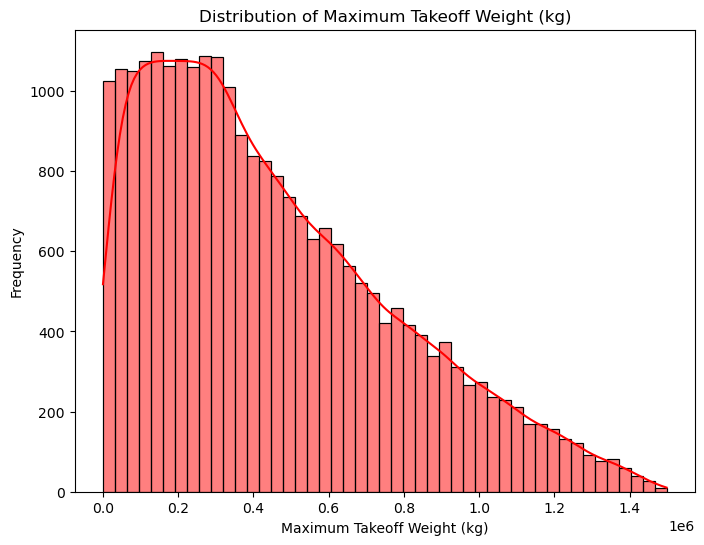

In [252]:
pt.figure(figsize=(8,6))
sns.histplot(df['Maximum_Takeoff_Weight(kgs)'],color='red',kde=True)
pt.xlabel('Maximum Takeoff Weight (kg)')
pt.ylabel('Frequency')
pt.title('Distribution of Maximum Takeoff Weight (kg)')
pt.show()

#### Observation:: 
Our Data Set Consists of High frequency of flights with Minimum Maximum Takeoff Weight and the there are few Aircrafts which can takeoff with Maximum weights.
which can be shown from below analysis that only 320 Aircrafts has capacity to carry max takeoff weight greater than 1300000.00

In [254]:
sqldf('select count(*) as count_of_aircrafts,"Aircraft Model" from df where "Maximum_Takeoff_Weight(kgs)">1300000.00 group by "Aircraft Model"')
###sqldf('select count(*) as sum from df where "Maximum Takeoff Weight (kg)">1300000.00 ')

,count_of_aircrafts,Aircraft Model
0,34,Airbus A320
1,31,Airbus A380
2,37,Beechcraft King Air 350
3,26,Boeing 737-800
4,33,Boeing 747-8
5,30,Boeing 777
6,30,Bombardier Global 6000
7,41,Cessna 172
8,29,Embraer E190
9,29,Gulfstream G650


In [255]:
sqldf('select count(*) as sum from df where "Maximum_Takeoff_Weight(kgs)">1300000.00 ')

,sum
0,320


### 6) Understanding the relation between the Maximum Takeoff Weight (kg) and the Engine Type 

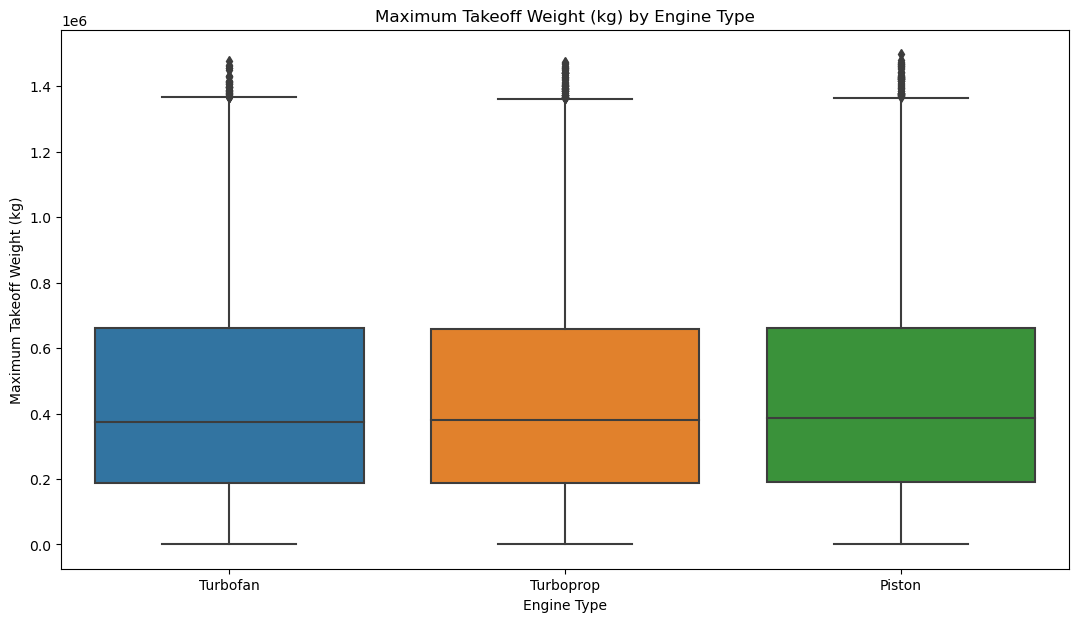

In [256]:
pt.figure(figsize=(13,7))
sns.boxplot( x='Engine Type',data=df,y='Maximum_Takeoff_Weight(kgs)')
pt.xlabel('Engine Type')
pt.ylabel('Maximum Takeoff Weight (kg)')
pt.title('Maximum Takeoff Weight (kg) by Engine Type')
pt.show()

#### Observation:
As shown in the above figure there is a uniformity in the relationship between the Maximum Takeoff Weight (kg) and the 3 types of engines. and the Maximum Takeoff weight capacity aircrafts have all 3 types of Engines as shown below.

In [30]:
sqldf('select count(*) as count_of_aircrafts,"Engine Type" from df where "Maximum Takeoff Weight (kg)">1300000.00 group by "Engine Type"')

,count_of_aircrafts,Engine Type
0,113,Piston
1,101,Turbofan
2,106,Turboprop


## Feature Engineering 

#### 1)Dividing the X(Features) and y(target) 

In [265]:
X=df.drop('Maximum_Takeoff_Weight(kgs)',axis=1)
X.head(2)

,Aircraft Model,Empty_Weight(kgs),Maximum_Landing_Weight(kg),Center of Gravity Limits,Wing Loading (kg/m²),Tail Loading (kg/m²),Fuel Capacity (liters),Number of Passengers,Cargo Capacity (kg),Maximum Altitude (ft),Maximum Speed (knots),Engine Type,Fuselage Length (m)
0,Airbus A320,149968.1875,255896.4903,30.0,818.558282,124.788364,52538.23617,472,80061.73229,44470,658,Turbofan,41.726817
1,Boeing 777,140855.8799,143703.3146,22.5,366.423230,111.743182,298000.26600,257,27118.72519,31739,495,Turbofan,54.402799


In [266]:
y=df['Maximum_Takeoff_Weight(kgs)']
y

0        2.795251e+05
1        1.450552e+05
2        5.343439e+05
3        8.151858e+05
4        4.390943e+05
             ...     
24995    3.836723e+05
24996    1.074710e+06
24997    1.272493e+05
24998    2.573037e+05
24999    7.422506e+05
Name: Maximum_Takeoff_Weight(kgs), Length: 25000, dtype: float64

In [267]:
print(f'the X-size :: {X.shape}')
print(f'the y-size :: {y.shape}')

the X-size :: (25000, 13)
the y-size :: (25000,)


#### 2)  Splitting of the Data into Test set and Train set and then categorical and Numerical 

In [268]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
## here we are using 30% of Data for testing and reaming 70% for training 

In [269]:
print(f'The Test and Train Data sizes after train_test_split')
print('**********************************************************')
print(f"The X_train's size is :: {X_train.shape}")
print(f"The X_test's size is :: {X_test.shape}")
print(f"The y_train's size is :: {y_train.shape}")
print(f"The y_test's size is :: {y_test.shape}")

The Test and Train Data sizes after train_test_split
**********************************************************
The X_train's size is :: (17500, 13)
The X_test's size is :: (7500, 13)
The y_train's size is :: (17500,)
The y_test's size is :: (7500,)


In [270]:
## Divide the Numerical and Categorical :-
categorical_attributes=X_train.select_dtypes(['object']).columns 
numerical_attibutes=X_train.select_dtypes(['int','float']).columns

In [271]:
print('1) categorical_attributes=',categorical_attributes)
print('2) numerical_attibutes=',numerical_attibutes)

1) categorical_attributes= Index(['Aircraft Model', 'Engine Type'], dtype='object')
2) numerical_attibutes= Index(['Empty_Weight(kgs)', 'Maximum_Landing_Weight(kg)',
       'Center of Gravity Limits', 'Wing Loading (kg/m²)',
       'Tail Loading (kg/m²)', 'Fuel Capacity (liters)',
       'Number of Passengers', 'Cargo Capacity (kg)', 'Maximum Altitude (ft)',
       'Maximum Speed (knots)', 'Fuselage Length (m)'],
      dtype='object')


In [275]:
## Applying OneHotEncoder(categorical attributes) and StandardScaling(Numerical Attributes)##
ct = ColumnTransformer([
    ("OneHotEncoder",OneHotEncoder(handle_unknown='ignore'),categorical_attributes),
    ("StandardScaler",StandardScaler(),numerical_attibutes)
])

X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [276]:
print(f"X_train's size :: {X_train.shape}")
print(f"X_test's size :: {X_test.shape}")

X_train's size :: (17500, 24)
X_test's size :: (7500, 24)


##### Models which are used to Build pipelines are below:-

In [277]:
#pipeline_support_vectors_machines =SVC(kernel='sigmoid',gamma=1.0) # This is Not working 
pipeline_KNeighborsRegressor=KNeighborsRegressor()
#pipeline_MultinomialNB=MultinomialNB() #this is not working 
pipeline_DecisionTreeRegressor=DecisionTreeRegressor(max_depth=5)
pipeline_LinearRegression=LinearRegression()
pipeline_RandomForestRegressor=RandomForestRegressor(n_estimators=40,random_state=2)
pipeline_AdaBoostRegressor=AdaBoostRegressor(random_state=2)
pipeline_BaggingRegressor=BaggingRegressor(random_state=2)
pipeline_ExtraTreesRegressor=ExtraTreesRegressor(n_estimators=40,random_state=2)
pipeline_GradientBoostingRegressor=GradientBoostingRegressor(random_state=2)
pipeline_XGBRFRegressor=XGBRFRegressor(n_estimators=40,random_state=2)
pipeline_lasso=Lasso()
pipeline_ridge=Ridge()

In [278]:
pipeline_LinearRegression.fit(X_train,y_train)

LinearRegression()

In [279]:
y_pred=pipeline_LinearRegression.predict(X_test)
y_pred

array([182211.75634836, 115908.37815775,  56856.95832538, ...,
        68806.65638992, 574121.53089701, 407614.766517  ])

In [280]:
print('The R2_score-',r2_score(y_pred,y_test))

The R2_score- 0.7266115067902615


##### Automating Building Pipelines 

In [281]:
##Step1:: Creating an Dictionary 
model= {
'pipeline_KNeighborsRegressor':pipeline_KNeighborsRegressor,
'pipeline_DecisionTreeRegressor':pipeline_DecisionTreeRegressor,
'pipeline_LinearRegression':pipeline_LinearRegression,
'pipeline_RandomForestRegressor':pipeline_RandomForestRegressor,
'pipeline_AdaBoostRegressor':pipeline_AdaBoostRegressor,
'pipeline_BaggingRegressor': pipeline_BaggingRegressor,
'pipeline_ExtraTreesRegressor':pipeline_ExtraTreesRegressor,
'pipeline_GradientBoostingRegressor':pipeline_GradientBoostingRegressor,
'pipeline_XGBRFRegressor':pipeline_XGBRFRegressor,
'pipeline_lasso':pipeline_lasso,
'pipeline_ridge':pipeline_ridge
}

In [282]:
##Step2:: Creating an Function to Run all models and Predict R2_score::
def train_pipes_regressor(model,X_train,y_train,X_test,y_test):
    from sklearn.metrics import r2_score
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2_score=r2_score(y_pred,y_test)
    
    return r2_score

In [283]:
## Step3:: Running the above Function and Storing r2_scores in a List:-
model_r2_score=[]

for name,item in model.items():
    models=train_pipes_regressor(item,X_train,y_train,X_test,y_test)
    
    model_r2_score.append(models) 

In [284]:
print('Accumualted R2_Score\n',model_r2_score)

Accumualted R2_Score
 [0.5215979297323392, 0.7258360504585522, 0.7266115067902615, 0.7286615807248246, 0.6828155100826567, 0.7144539370072986, 0.7284217812830819, 0.7354605296037543, 0.7338032044673393, 0.7266097846450872, 0.726592393579635]


In [285]:
# Step4: Storing the R2_Score created and the corresponding model name in a Dataframe:-
performance= p.DataFrame({'Model_name':model.keys(),'R2_Score':model_r2_score}).sort_values('R2_Score',ascending=False)

In [286]:
## Step 5 ::Dropping the Extra Column and reindexing;;;;;
performance=performance.reset_index(drop=True)
performance.index=performance.index+1

In [287]:
performance.index.name='Model_Rank'

In [210]:
print("The Model Ranking Based on there R2_Score:-")
performance.reset_index()

The Model Ranking Based on there R2_Score:-


,Model_Rank,Model_name,R2_Score
0,1,pipeline_XGBRFRegressor,0.733794
1,2,pipeline_RandomForestRegressor,0.728390
2,3,pipeline_BaggingRegressor,0.727189
3,4,pipeline_LinearRegression,0.726611
4,5,pipeline_lasso,0.726610
5,6,pipeline_ridge,0.726592
6,7,pipeline_ExtraTreesRegressor,0.726327
7,8,pipeline_GradientBoostingRegressor,0.726081
8,9,pipeline_DecisionTreeRegressor,0.725836
9,10,pipeline_AdaBoostRegressor,0.684225


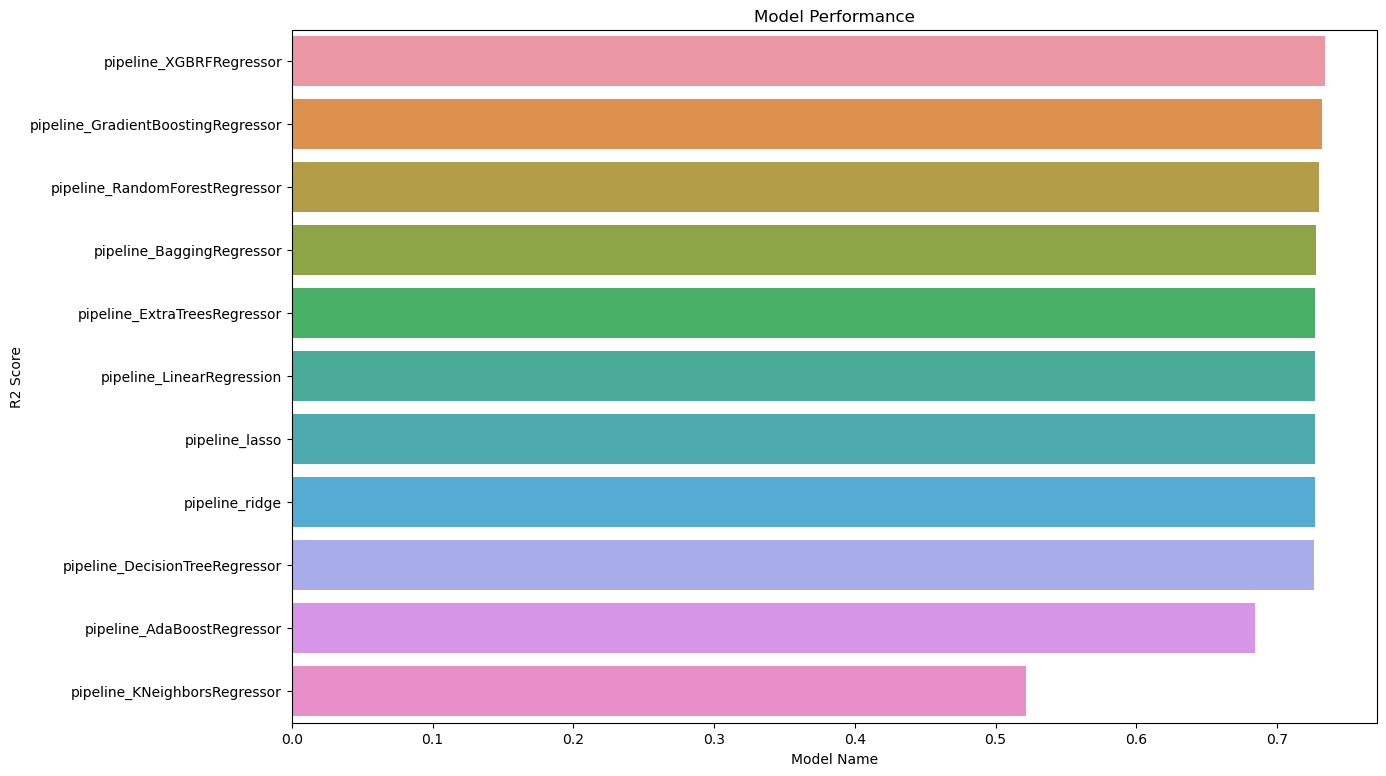

In [143]:
pt.figure(figsize=(14,9))
sns.barplot(y='Model_name', x='R2_Score', data=performance)
pt.xticks(rotation=0)
pt.xlabel('Model Name')
pt.ylabel('R2 Score')
pt.title('Model Performance')
pt.show()

### Hyperparameter Tunning to improve model performance:

In [289]:
## Tunning on Ridge_Regressor 
ridge= Ridge()
params = {'alpha':[1e-10,1e-15,1e-8,1e-3,1e-2,5,1,10,15,20]}
ridge_reg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=10)
ridge_reg.fit(X_train,y_train)
ridge_predict=ridge_reg.predict(X_test)
score= r2_score(ridge_predict,y_test)
print(f'The Score for Ridge after Tunning={score}')

The Score for Ridge after Tunning=0.7262286115172679


In [291]:
## Tunning on RandomForest Regressor :-
Rf_regressor= RandomForestRegressor()

RF_param = {  
    'max_depth': [None, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2']  
}

rf_reg = GridSearchCV(Rf_regressor,RF_param,scoring='neg_mean_squared_error',cv=3)
rf_reg.fit(X_train,y_train)

# Predicting the model using RandomForest
RandomForest_predict=rf_reg.predict(X_test)
score= r2_score(RandomForest_predict,y_test)
print(f'The Score for RandomForest after Tunning={score}')

The Score for RandomForest after Tunning=0.7320999888794812


### Conclusion :-
Based on the observations of the given Dataset, the following conclusions can be summarized:

1)The dataset consists of 25,000 rows and 15 columns, with one unnamed-column that we have dropped as it has no significant impact on the analysis,There are non-null/NaN or duplicate values observed in the Dataset,Indicating a clean and consistent data structure.

2)The "Center of Gravity Limits" attribute needs to be modified to apply one-hot encoding,.
The float values in the dataset have multiple decimal points,rounded to two decimal points for better readability.

3)The Heatmap analysis reveals a high correlation between the "Maximum_Takeoff_Weight(kgs)," "Maximum_Landing_Weight(kgs)," and "Empty Weight" attributes, as highlighted in yellow. This correlation suggests that these attributes are closely related and may influence one other.

4)The Target column-"Maximum Takeoff Weight (kg)," has a very low correlation with all other attributes except "Empty Weight (kg)" and "Maximum Landing Weight (kg)." This observation indicates that these two attributes are the most influential factors for determining the maximum takeoff weight.

5)The Dataset consists of a high frequency of flights with minimum-maximum takeoff weight, and there are few aircraft that can take off with maximum weights. The analysis shows that only 320 aircraft have the capacity to carry a maximum_takeoff_weight greater than 1300000kg.

6)The relationship between the "Maximum_Takeoff_Weight(kgs)" and the three types of engines (turboprop, turbofan, and turbojet) is uniform. Additionally, the aircraft with the maximum takeoff weight capacity have all 3 types of engines, suggesting that engine-type plays a crucial role in determining the maximum takeoff weight.

7)The Top 3 Performing Models with respect to there corresponding R2-Score are Xgboost,Gradientboosting and Random Forest Regressor and other models are mentioned in the figure(model performance), To improve the model performance Hyperparametric Tunning is performed and it can be observed that there is no significant improvement in the model performances.